### Домашнее задание №0 [0.2 балла]

**Условие**:

Функция `delete_zeros_from_array` принимает на вход массив целых чисел из промежутка [0; 5] и удалает из него все _нули_. Алгоритм должен иметь сложность `O(N)`, где N - длина массива, и использовать `O(1)` дополнительной памяти.

Построить **графики** зависимости времени работы алгоритма от количества элементов в нем. 

**Примечания**:

1) Для наглядности лучше генерить массивы, в которых количество удаляемых элементов **больше трети** от всех элементов.

2) В такой постановке можно проверить, как разработчик выбирает имена переменных и думает ли о функции глобально. Например, следующим вопросом было бы "А что если хотим удалять единицы?"

In [1]:
# Bad way

def delete_zeros_from_array(array):
    #     logic for deleting zeroes
    return [elem for elem in array if elem != 0]

In [2]:
# Not bad way

from functools import partial

def delete_elements_from_array(array, value_to_drop):
    """
        This function deletes all elements that equal to element from array. 
        
        :param array: Input array
        :type array: list
        :param value_to_drop: Element that must be deleted from array
        :type value_to_drop: int
        
        :returns: New array without element with the other elements in the same order
        :rtype: list
    """
    return filter(lambda elem: elem != value_to_drop, array)
    
    
# delete_zeros_from_array = partial(delete_elements_from_array, value_to_drop=0)

In [3]:
from random import randrange
import math
import sys
from time import time
from tqdm import tqdm_notebook

observations = []
observations_quick = []

for size in tqdm_notebook(range(0, int(1e6), 10000)):
    array = [randrange(1, 5) for _ in range(int(size*0.6))] + [0] * int(size*0.4)
    
    start_time = time()
    _ = delete_elements_from_array(array, value_to_drop=0)
    finish_time = time()
    observations_quick.append([size, finish_time-start_time])
    
    start_time = time()
    _ = delete_zeros_from_array(array)
    finish_time = time()
    observations.append([size, finish_time-start_time])

In [4]:
import matplotlib.pyplot as plt

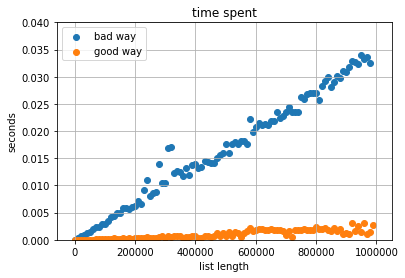

In [5]:
plt.ylim(0, 0.04)
plt.grid()
plt.title("time spent")
plt.ylabel("seconds")
plt.xlabel("list length")
plt.scatter([x[0] for x in observations], [x[1] for x in observations], label="bad way")
plt.scatter([x[0] for x in observations_quick], [x[1] for x in observations_quick], label='good way')
plt.legend()

Зачем нужна doc string? Как её посмотреть?

**Ответ**: удобный способ добавления и хранения документации к коду. Вызвать у объекта/метода `.__doc__`

### Домашнее задание №1 [0.05 балла]

**Условие**:

Написать функцию (-и), которая принимает на вход 3 комплексных числа и выводит минимальное из них по модулю без использования функций min, max, sort и т.д.


**Комментарии**:

1) В процессе сдачи задания, можно будет получить дополнительные баллы

2) Код должен быть пригоден для промышленного использования

In [6]:
class Complex:
    def __init__(self, real, imag):
        self.real = real
        self.imag = imag
        self.squared_absolute_value = real ** 2 + imag ** 2
    
    def __lt__(self, other):
        return self.squared_absolute_value < other.squared_absolute_value
    
    def __repr__(self):
        default = "{}+{}i"
        if self.imag < 0:
            default = "{}{}i"
        elif self.imag == 0:
            default = "{}"
        return default.format(self.real, self.imag)

def minimum_complex_number(*args):
    numbers = [Complex(elem.real, elem.imag) for elem in args]
    minval = numbers[0]
    for num in numbers[1:]:
        if minval > num:
            minval = num
    return minval
    
n1 = Complex(2, -1)
n2 = Complex(2, 2)
n3 = Complex(2.1, 0)

minimum_complex_number(2-0.1j, 3, 2-0.1j)

2.0-0.1i

### Домашнее задание №2 [0.18 балла]

**Условие**:

Вы - банкомат, который работает по следующей схеме: считывает номер вставленной в него карты, парсит его на 4 равные части и генерирует 4 числа Фибоначчи с номерами, соответствущими распаршенным частям. Затем генерирует числа из всевозможных перестановок полученных чисел Фибоначчи (конкатенацией).

Для каждого числа из полученного набора банкомат находит НОД с введеным пользователем паролем и возвращает медиану из полученных НОДов. 

**Комментарии**:

1) Поток клиентов большой, операции повторяющиеся - хорошо бы, чтобы со временем банкомат отвечал быстрее на запросы.

2) За неполное решение также дается часть баллов.

**Ключевые слова**: lru_cache, permutations, алгоритм Евклида

In [7]:
from itertools import permutations
from statistics import median # standartlib
from math import gcd # standartlib
from functools import lru_cache

cache_size = int(10e6)

class ATM():
    
    def __init__(self):
        
        self.parts_to_split = 4
        self.phi = (math.sqrt(5) + 1) / 2
    
    def _fast_fib(self, n):
        return round(math.pow(self.phi, n) / math.sqrt(5))
    
    @lru_cache(maxsize=cache_size)
    def fib_number(self, n):
        if n < 100:
            return self._fast_fib(n)

        if n % 2 == 0: # even
            _n = int(n / 2)
            Fn = self.fib_number(_n)
            return (Fn + 2 * self.fib_number(_n-1)) * Fn
        else: #odd
            _n = int(n / 2)
            return self.fib_number(_n) ** 2 + self.fib_number(_n + 1)
    
    def split_string(self, string):
        return [int(string[i:i+self.parts_to_split]) for i in range(0, len(string), self.parts_to_split)]
    
    def process_input(self, card_number, password):
        
        card_number = str(card_number).replace(" ", "")

        if not (str.isdigit(str(card_number)) & (len(card_number) == 16)):
            raise ValueError('Card number is not valid')
        
        if not (str.isdigit(str(password)) & (len(str(password)) == 4)):
            raise ValueError('Password is not valid')
            
        card_parts = self.split_string(card_number)
        
        return card_parts, int(password)
    
    
    def process_card(self, card_number, raw_password):
        
        card_parts, password = self.process_input(card_number, raw_password)
        
        fib_numbers = [str(self.fib_number(n)) for n in card_parts]
        
        permuts = [int(''.join(elem)) for elem in permutations(fib_numbers)]
        
        answer = median([gcd(num, password) for num in permuts])
        
        return answer

In [8]:
atm = ATM()
card_number = "5559 4928 0239 9125"
password = '1423'
atm.process_card(card_number, password)

1.0

### Домашнее задание №4 [0 - 0.1 балла]

**Условие:**
    
Написать аналог permutations и провести сравнение скорости работы и потребления памяти.

**Комментарий:**

Количество баллов зависит от полноты сравнения.

In [9]:
def permutation_list(array):
    if not array:
        return [[]]
    
    perms = []
    for index, elem in enumerate(array):
        temp = array[:index] + array[index+1:]
        perms.extend([[elem] + tail for tail in permutation_list(temp)])

    return perms

In [10]:
observations_own = []
observations_standart = []

n_trials = 20 


for trial in tqdm_notebook(range(n_trials)):
    for size in (range(10)):
        array = [1 for _ in range(size)]

        start_time = time()
        size_own = sys.getsizeof(list(permutation_list(array)))
        finish_time = time()
        observations_own.append([size, finish_time-start_time, size_own])

        start_time = time()
        size_standart = sys.getsizeof(list(permutations(array)))
        finish_time = time()
        observations_standart.append([size, finish_time-start_time, size_standart])

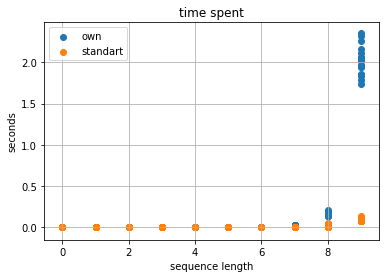

In [11]:
plt.grid()
plt.title("time spent")
plt.ylabel("seconds")
plt.xlabel("sequence length")
plt.scatter([x[0] for x in observations_own], [x[1] for x in observations_own], label="own")
plt.scatter([x[0] for x in observations_standart], [x[1] for x in observations_standart], label='standart')
plt.legend()

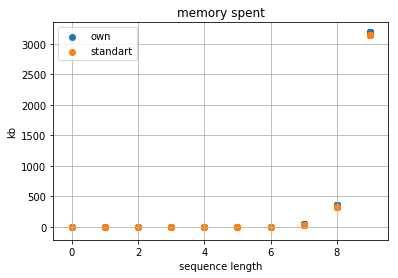

In [12]:
plt.grid()
plt.title("memory spent")
plt.ylabel("kb")
plt.xlabel("sequence length")
plt.scatter([x[0] for x in observations_own], [x[2] / 1024 for x in observations_own], label="own")
plt.scatter([x[0] for x in observations_standart], [x[2] / 1024 for x in observations_standart], label='standart')
plt.legend()